# Домашнее задание "Теория оптимизации".

### Задание.

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

In [3]:
bounds = [(-10, 10), (-10, 10)]

### Популяция

In [43]:
population_vs_iteration = dict()
for i in range(1,10,1):
    result = differential_evolution(ackley, bounds, seed=42, popsize=i)
    if (result.success == True) and (round( result.x.sum() ,3) == 0 ):
        population_vs_iteration[i] = result.nit
population_vs_iteration

{3: 29, 4: 39, 5: 100, 6: 99, 7: 87, 8: 97, 9: 101}

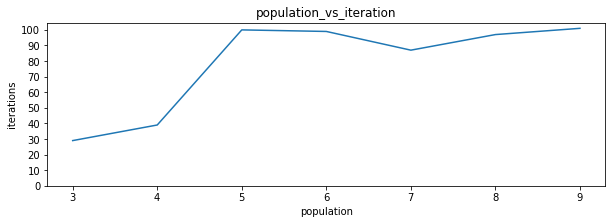

In [44]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
plt.plot(population_vs_iteration.keys(),population_vs_iteration.values())
ax.set( title = 'population_vs_iteration', ylabel = 'iterations', xlabel = 'population', yticks = np.arange(0,110,10) );

С **ростом** множителя популяции **popsize** количество **итераций растет** 

### Проверим погрешность:

In [49]:
tolerance_vs_iteration = dict()
tolerance_array = np.linspace(1e-6,1,100)

for i in tolerance_array:
    result = differential_evolution(ackley, bounds, seed=42, tol=i)
    if (result.success == True) and (round( result.x.sum() ,3) == 0 ):
        tolerance_vs_iteration[i] = result.nit

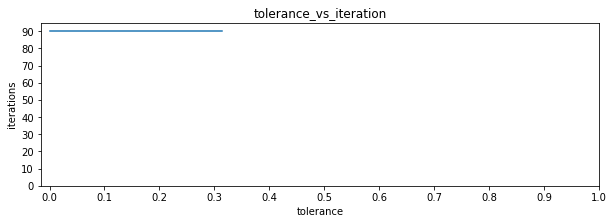

In [50]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
plt.plot(tolerance_vs_iteration.keys(),tolerance_vs_iteration.values())
ax.set( title = 'tolerance_vs_iteration', ylabel = 'iterations', xlabel = 'tolerance', xticks = np.arange(0,1.1,0.1), yticks = np.arange(0,100,10) );

С **ростом** погрешности **до tol=.3** количество итераций **не меняется**,  после tol=.3 результат не корректный .  

### Проверим абсолютную погрешность (atol):

In [51]:
abstolerance_vs_iteration = dict()
tolerance_array = np.linspace(1e-6,1,100)

for i in tolerance_array:
    result = differential_evolution(ackley, bounds, seed=42, atol=i)
    if (result.success == True) and (round( result.x.sum() ,3) == 0 ):
        abstolerance_vs_iteration[i] = result.nit

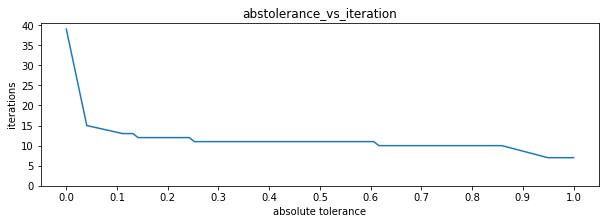

In [54]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
plt.plot(abstolerance_vs_iteration.keys(),abstolerance_vs_iteration.values())
ax.set( title = 'abstolerance_vs_iteration', ylabel = 'iterations', xlabel = 'absolute tolerance', xticks = np.arange(0,1.1,0.1), yticks = np.arange(0,41,5) );

С **ростом** абсолютной погрешности **atol** количество **итераций уменьшается** 

### Проверим коэффициент мутации (mutation) 
-> будут гипер-мутанты, но охватим бОльшую площадь:

In [60]:
mutation_vs_iteration = dict()
mutation_array = np.arange(1e-6,2,0.05)

for i in mutation_array:
    result = differential_evolution(ackley, bounds, seed=42, mutation=i)
    if (result.success == True) and (round( result.x.sum() ,3) == 0 ):
        mutation_vs_iteration[i] = result.nit
mutation_vs_iteration

{1e-06: 3,
 0.050001000000000004: 5,
 0.15000100000000002: 26,
 0.200001: 30,
 0.250001: 34,
 0.300001: 39,
 0.350001: 42,
 0.400001: 47,
 0.450001: 56,
 0.500001: 61,
 0.5500010000000001: 66,
 0.6000010000000001: 77,
 0.650001: 86,
 0.7000010000000001: 95,
 0.750001: 105,
 0.8000010000000001: 114,
 0.8500010000000001: 133,
 0.900001: 135,
 0.9500010000000001: 150,
 1.000001: 135,
 1.050001: 176,
 1.100001: 176,
 1.150001: 202,
 1.200001: 197,
 1.250001: 214,
 1.300001: 251,
 1.350001: 251,
 1.400001: 249,
 1.450001: 283,
 1.500001: 291,
 1.550001: 310,
 1.600001: 342,
 1.650001: 347,
 1.700001: 346,
 1.750001: 366,
 1.800001: 373,
 1.850001: 376,
 1.900001: 384,
 1.950001: 264}

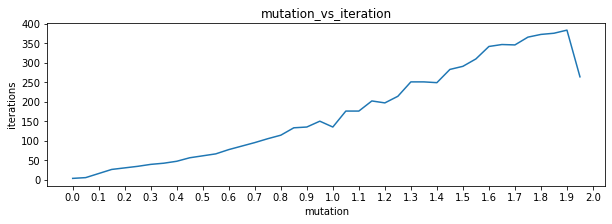

In [61]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
plt.plot(mutation_vs_iteration.keys(),mutation_vs_iteration.values())
ax.set( title = 'mutation_vs_iteration', ylabel = 'iterations', xlabel = 'mutation', yticks = np.arange(0,401,50),xticks = np.arange(0,2.1,.1) );

С **ростом** коэффициент мутации **mutation** количество **итераций растет**, на максимальной мутации резко падает. 

### Проверим коэффициент вероятности мутации (recombination) 
-> мутантов станет очень много:

In [62]:
recombination_vs_iteration = dict()
recombination_array = np.arange(1e-6,1,0.05)

for i in recombination_array:
    result = differential_evolution(ackley, bounds, seed=42, recombination=i)
    if (result.success == True) and (round( result.x.sum() ,3) == 0 ):
        recombination_vs_iteration[i] = result.nit

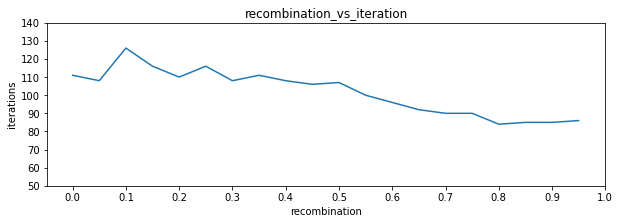

In [65]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
plt.plot(recombination_vs_iteration.keys(),recombination_vs_iteration.values())
ax.set( title = 'recombination_vs_iteration', ylabel = 'iterations', xlabel = 'recombination', yticks = np.arange(50,150,10),xticks = np.arange(0,1.1,.1) );

С **ростом** коэффициента вероятности мутации **recombination** количество **итераций падает**  

### Проверим метод обновления вектора лучшей особи (updating) 
-> искать лучшего внутри одной генерации или сравнивать генерации (родителя с детьми):

In [66]:
updating_vs_iteration = dict()

result = differential_evolution(ackley, bounds, seed=42, updating='immediate')
if (result.success == True) and (round( result.x.sum() ,3) == 0 ):
    updating_vs_iteration['immediate'] = result.nit
    
result = differential_evolution(ackley, bounds, seed=42, updating='deferred')
if (result.success == True) and (round( result.x.sum() ,3) == 0 ):
    updating_vs_iteration['deferred'] = result.nit
    
updating_vs_iteration

{'immediate': 90, 'deferred': 122}

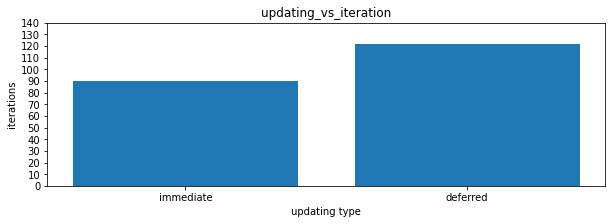

In [72]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

plt.bar(updating_vs_iteration.keys(),updating_vs_iteration.values())
ax.set( title = 'updating_vs_iteration', ylabel = 'iterations', xlabel = 'updating type', yticks = np.arange(0,150,10) );

Искать лучшего внутри одной генерации **(immediate) быстрее**, чем сравнивать генерации (родителя с детьми) (deferred):

### Проверим лучшую стратегию

In [74]:
strategy_vs_iteration = dict()

for i in ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp',
          'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 
          'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']:
    
    result = differential_evolution(ackley, bounds, seed=42, strategy=i)
    if (result.success == True) and (round( result.x.sum() ,3) == 0 ):
        strategy_vs_iteration[i] = result.nit

strategy_vs_iteration

{'best1bin': 90,
 'best1exp': 147,
 'rand1exp': 246,
 'randtobest1exp': 156,
 'best2exp': 244,
 'rand2exp': 341,
 'randtobest1bin': 101,
 'best2bin': 166,
 'rand2bin': 232,
 'rand1bin': 168}

In [85]:
#sort
strategy_vs_iteration = dict( sorted( strategy_vs_iteration.items(), key = lambda x: x[1] ) )
strategy_vs_iteration

{'best1bin': 90,
 'randtobest1bin': 101,
 'best1exp': 147,
 'randtobest1exp': 156,
 'best2bin': 166,
 'rand1bin': 168,
 'rand2bin': 232,
 'best2exp': 244,
 'rand1exp': 246,
 'rand2exp': 341}

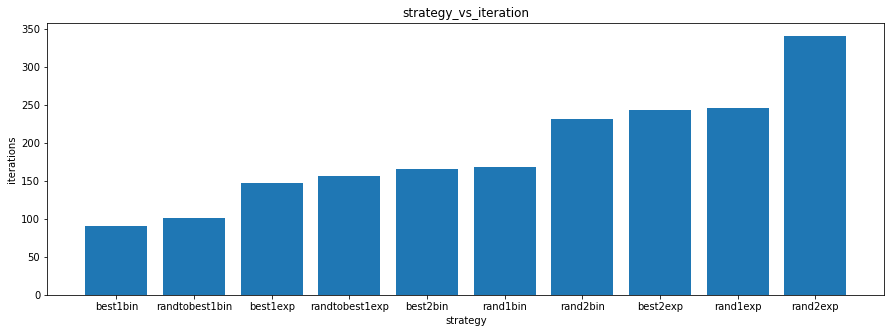

In [84]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

plt.bar(strategy_vs_iteration.keys(),strategy_vs_iteration.values())
ax.set( title = 'strategy_vs_iteration', ylabel = 'iterations', xlabel = 'strategy', yticks = np.arange(0,355,50) );

Самой лучшей стратегией оказалась по-умолчанию - 'best1bin' - минимальное кол-во итераций = 90

### Подведем итоги:

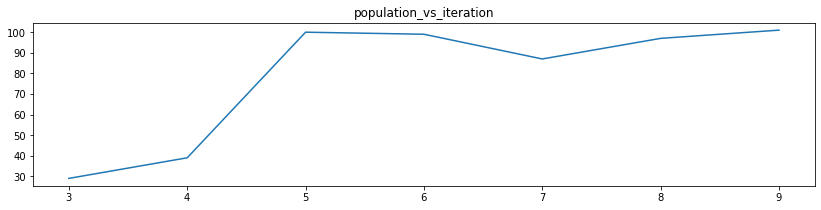

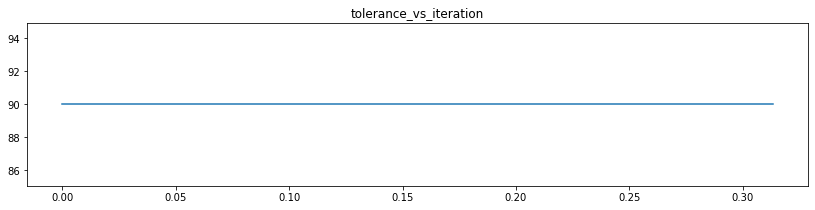

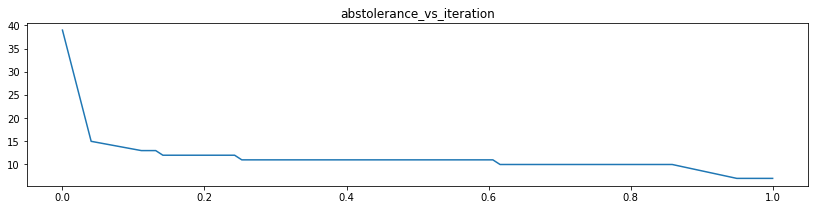

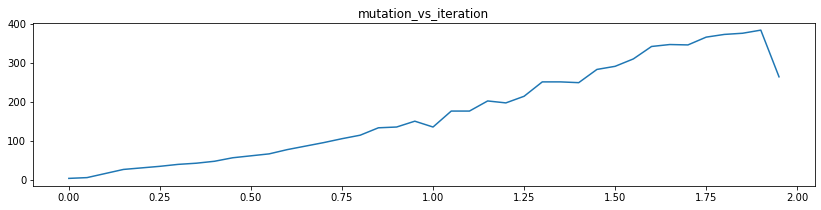

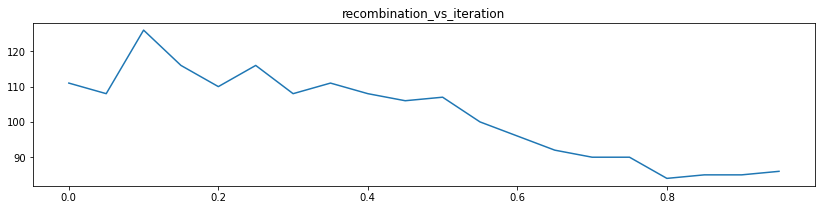

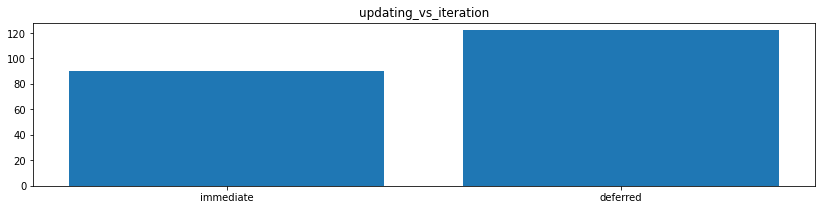

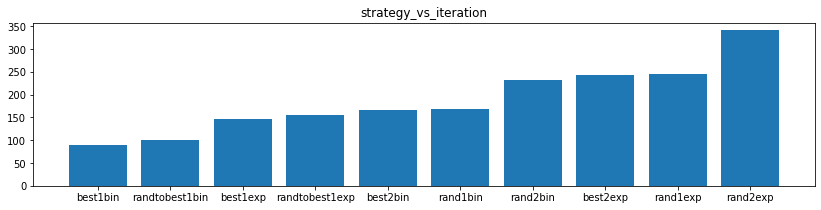

In [103]:
dictionary_array_names = ['population_vs_iteration', 'tolerance_vs_iteration', 'abstolerance_vs_iteration', 
                          'mutation_vs_iteration', 'recombination_vs_iteration', 'updating_vs_iteration', 
                          'strategy_vs_iteration'] 

dictionary_array = [population_vs_iteration, tolerance_vs_iteration, abstolerance_vs_iteration, mutation_vs_iteration, 
                    recombination_vs_iteration, updating_vs_iteration, strategy_vs_iteration] 

for i,dictionary_i in enumerate(dictionary_array):
    fig = plt.figure(figsize=(14,3))
    ax = fig.add_subplot(111)
    if i <5:
        plt.plot(dictionary_i.keys(),dictionary_i.values())
    if i>=5:
        plt.bar(dictionary_i.keys(),dictionary_i.values())
        
    ax.set( title = dictionary_array_names[i]);
    plt.show()

### Дополнительное задание.

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

NameError: name 'differential_evolution' is not defined

In [105]:
minimum_of_iterations = 300
best_params = dict()


# population
for i in range(1,10,1):
    
    result = differential_evolution(ackley, bounds, seed=42, popsize=i)
    if (result.success == True) and (round( result.x.sum() ,3) == 0 ):
        if result.nit < minimum_of_iterations: 
            minimum_of_iterations = result.nit
            best_params['popsize'] = i
        
        
        
minimum_of_iterations, best_params

(29, {'popsize': 3})

по прошлому заданию мы знаем что updating самое лучшее immediate - поиск лучшего среди одной генерации. Проверим

In [ ]:
minimum_of_iterations = 300
best_params = dict()
tolerance_array = np.linspace(1e-6,1,10)
mutation_array = np.arange(1e-6,2,0.2)
recombination_array = np.arange(1e-6,1,0.2)

# population i
for i in range(1,10,1):
    
    # tolerance j
    for j in tolerance_array:
        
        # atolerance k
        for k in tolerance_array:
        
            #mutation l
            for l in mutation_array:
                
                #recombination t
                for t in recombination_array:
                    
                    #updating u
                    for u in ['immediate','deferred']:
                    
                        #strategy s  # эти стратегии не подходят по логике: ,'rand2exp' , 'rand2bin'
                        for s in ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp',
                                  'currenttobest1exp', 'best2exp', 'randtobest1bin', 
                                  'currenttobest1bin', 'best2bin', 'rand1bin']:

                            if u=='immediate':
                                result = differential_evolution(ackley, bounds, seed=42, popsize=i, tol=j, 
                                                                atol=k, mutation=l, recombination=t, 
                                                                updating=u, strategy=s)
                            else: 
                                result = differential_evolution(ackley, bounds, seed=42, popsize=i, tol=j, 
                                                                atol=k, mutation=l, recombination=t, 
                                                                updating=u, strategy=s, workers=-1)
                                
                            
                            if (result.success == True) and ( np.all(abs(result.x) < 0.01) ):
                                if result.nit < minimum_of_iterations: 
                                    minimum_of_iterations = result.nit
                                    best_params['popsize'] = i 
                                    best_params['tol'] = j
                                    best_params['atol'] = k
                                    best_params['mutation'] = l
                                    best_params['updating'] = u
                                    best_params['strategy'] = s
                            
!telegram-send 'Я_посчитал'       
minimum_of_iterations, best_params

In [4]:
minimum_of_iterations = 300
best_params = dict()
tolerance_array = np.linspace(1e-6,1,10)
mutation_array = np.arange(1e-6,2,0.2)
recombination_array = np.arange(1e-6,1,0.2)

# population i
for i in range(1,10,1):
    
    # tolerance j
    for j in tolerance_array:
        
        # atolerance k
        for k in tolerance_array:
        
            #mutation l
            for l in mutation_array:
                
                #recombination t
                for t in recombination_array:
                                    
                    result = differential_evolution(ackley, bounds, seed=42, popsize=i, tol=j, 
                                                        atol=k, mutation=l, recombination=t, 
                                                        updating='immediate', strategy='best1bin')


                    if (result.success == True) and ( np.all(abs(result.x) < 0.01) ):
                        if result.nit < minimum_of_iterations: 
                            minimum_of_iterations = result.nit
                            best_params['popsize'] = i 
                            best_params['tol'] = j
                            best_params['atol'] = k
                            best_params['mutation'] = l
                            best_params['updating'] = 'immediate'
                            best_params['strategy'] = 'best1bin'
                            
!telegram-send 'Я_посчитал'       
minimum_of_iterations, best_params

(1,
 {'popsize': 1,
  'tol': 1e-06,
  'atol': 0.111112,
  'mutation': 1e-06,
  'updating': 'immediate',
  'strategy': 'best1bin'})

In [5]:
import pickle

In [6]:
with open('params.pickle' , 'wb') as f:
    pickle.dump(best_params,f)
f.close() 

In [7]:
!telegram-send 'Я_все_сделал_Босс' 

In [141]:
result = differential_evolution(ackley, bounds, seed=42, popsize=1, tol=0.003)
result

     fun: 6.2115685928176845e-09
     jac: array([1.94569694, 2.75601728])
 message: 'Optimization terminated successfully.'
    nfev: 236
     nit: 9
 success: True
       x: array([-1.12318585e-09,  1.88716736e-09])